In [30]:
#Finance Project

#import libararies
from pandas_datareader import data, wb #read data directly from the internet
import pandas as pd
import numpy as np
import seaborn as sns
import datetime
%matplotlib inline

In [2]:
"""get stock information for the following banks:

Bank of America
CitiGroup
Goldman Sachs
JPMorgan Chase
Morgan Stanley
Wells Fargo """

'get stock information for the following banks:\n\nBank of America\nCitiGroup\nGoldman Sachs\nJPMorgan Chase\nMorgan Stanley\nWells Fargo '

In [33]:
start = datetime.datetime(2006, 1, 1)
end = datetime.datetime(2016, 1, 1)

In [34]:
# Bank of America
BAC = data.DataReader("BAC", 'yahoo', start, end)

#CitiGroup
C = data.DataReader("C", 'yahoo', start,end)

#Goldman Sachs
GS = data.DataReader("GS", 'yahoo',start, end)

#JP Morgan Chase
JPM = data.DataReader("JPM", 'yahoo', start, end)

#Morgan Stanley
MS = data.DataReader("MS",'yahoo', start, end)

#Wells Fargo
WFC = data.DataReader("WFC", 'yahoo', start, end)

In [35]:
tickers = ['BAC','C', 'GS', 'JPM', 'MS', 'WFC']

In [36]:
bank_stocks = pd.concat([BAC, C, GS, JPM, MS, WFC], axis = 1, keys=tickers)

In [37]:
bank_stocks.columns.names = ['Bank Tickers', 'Stock Info']
bank_stocks.head()

Bank Tickers        BAC                                               \
Stock Info         High        Low       Open      Close      Volume   
Date                                                                   
2006-01-03    47.180000  46.150002  46.919998  47.080002  16296700.0   
2006-01-04    47.240002  46.450001  47.000000  46.580002  17757900.0   
2006-01-05    46.830002  46.320000  46.580002  46.639999  14970700.0   
2006-01-06    46.910000  46.349998  46.799999  46.570000  12599800.0   
2006-01-09    46.970001  46.360001  46.720001  46.599998  15619400.0   

Bank Tickers                      C                                      ...  \
Stock Info    Adj Close        High         Low        Open       Close  ...   
Date                                                                     ...   
2006-01-03    34.811729  493.799988  481.100006  490.000000  492.899994  ...   
2006-01-04    34.442013  491.000000  483.500000  488.600006  483.799988  ...   
2006-01-05    34.486385  487.799988  484.000000  484.399994  486.200012  ...   
2006-01-06    34.434616  489.000000  482.000000  488.799988  486.200012  ...   
2006-01-09    34.456806  487.399994  483.000000  486.000000  483.899994  ...   

Bank Tickers         MS                                         WFC  \
Stock Info         Open      Close     Volume  Adj Close       High   
Date                                                                  
2006-01-03    57.169998  58.310001  5377000.0  37.170383  31.975000   
2006-01-04    58.700001  58.349998  7977800.0  37.195881  31.820000   
2006-01-05    58.549999  58.509998  5778000.0  37.297882  31.555000   
2006-01-06    58.770000  58.570000  6889800.0  37.336124  31.775000   
2006-01-09    58.630001  59.189999  4144500.0  37.731342  31.825001   

Bank Tickers                                                          
Stock Info          Low       Open      Close      Volume  Adj Close  
Date                                                                  
2006-01-03    31.195000  31.600000  31.900000  11016400.0  20.324865  
2006-01-04    31.365000  31.799999  31.530001  10870000.0  20.089125  
2006-01-05    31.309999  31.500000  31.495001  10158000.0  20.066822  
2006-01-06    31.385000  31.580000  31.680000   8403800.0  20.184694  
2006-01-09    31.555000  31.674999  31.674999   5619600.0  20.181515  

[5 rows x 36 columns]

In [38]:
#Exploratory Data analysis

#analyzing the max close price for each bank throughout the time period

for tick in tickers:
    print(tick,bank_stocks[tick]['Close'].max())


BAC 54.900001525878906
C 564.0999755859375
GS 247.9199981689453
JPM 70.08000183105469
MS 89.30000305175781
WFC 58.52000045776367


In [39]:
#usin cross-section
bank_stocks.xs('Close',axis = 1, level = 'Stock Info').max()

Bank Tickers
BAC     54.900002
C      564.099976
GS     247.919998
JPM     70.080002
MS      89.300003
WFC     58.520000
dtype: float64

In [40]:
#calculating return for each bank's stock
#return is price at given timeperiod - price at previous timeperiod
returns = pd.DataFrame()
for tick in tickers:
    returns[tick+ 'return'] = bank_stocks[tick]['Close'].pct_change()

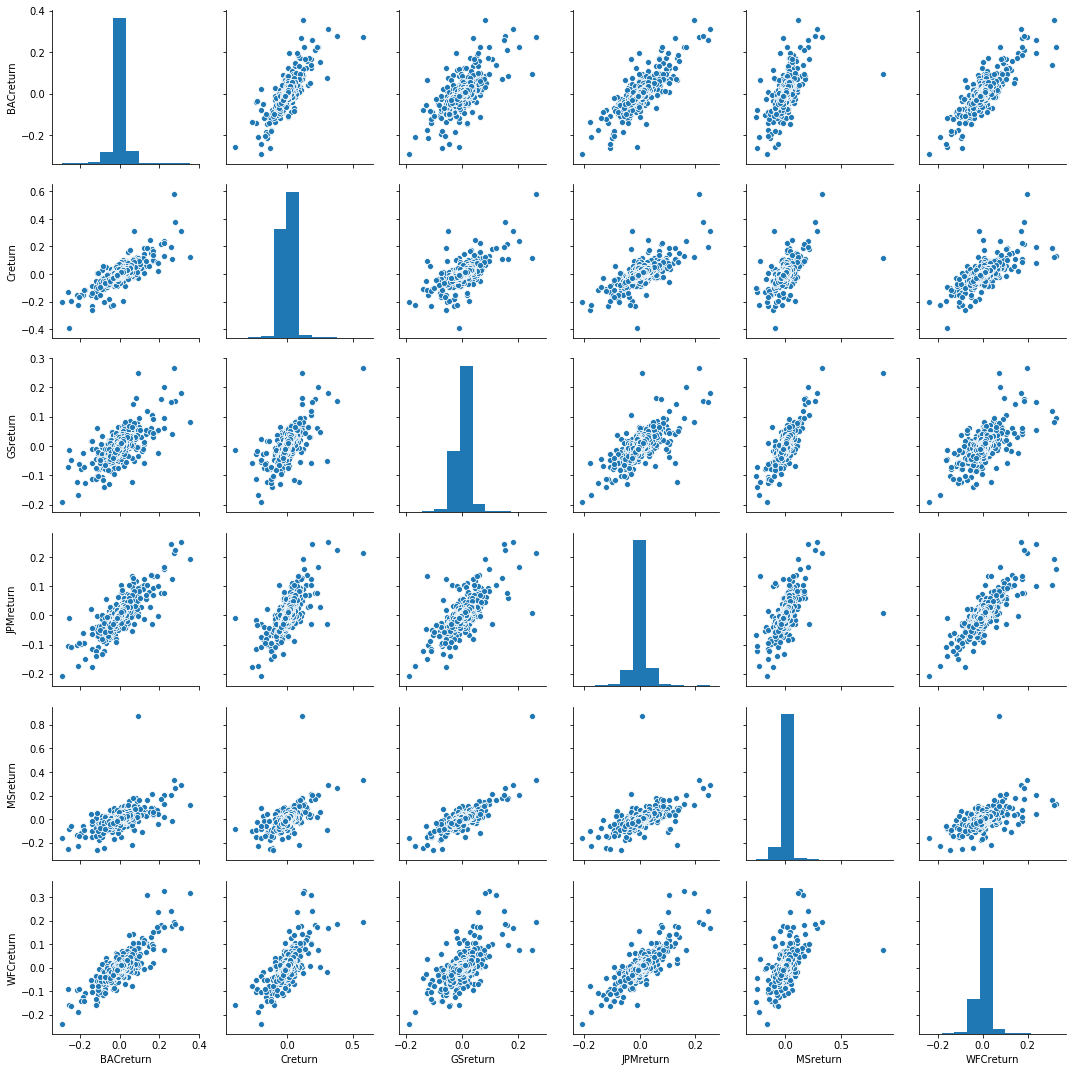

In [41]:
#pairplot of returns
sns.pairplot(returns[1:])

In [42]:
#dates each bank stock had the best and worst single day returns

returns.idxmin() #worst single day returns

#analysis- BAC,GS, WFC had worst returns on the same day. Major event on this day is Obama inaugral
    

BACreturn   2009-01-20
Creturn     2009-02-27
GSreturn    2009-01-20
JPMreturn   2009-01-20
MSreturn    2008-10-09
WFCreturn   2009-01-20
dtype: datetime64[ns]

In [43]:
returns.idxmax() #best single day returns

#JPM had best return the very next day to its worst return

BACreturn   2009-04-09
Creturn     2008-11-24
GSreturn    2008-11-24
JPMreturn   2009-01-21
MSreturn    2008-10-13
WFCreturn   2008-07-16
dtype: datetime64[ns]

In [44]:
#Using standard deviation to identiy the riskiness of a stock

returns.std()

#Citigroup has the highest Std deviation. Hence is the riskiest

BACreturn    0.036647
Creturn      0.038672
GSreturn     0.025390
JPMreturn    0.027667
MSreturn     0.037819
WFCreturn    0.030238
dtype: float64

In [48]:
#Riskiest stock for year 2015
returns.loc['2015-01-01':'2015-12-31'].std()

#MS and BAC have riskiest stocks for year 2015

BACreturn    0.016163
Creturn      0.015289
GSreturn     0.014046
JPMreturn    0.014017
MSreturn     0.016249
WFCreturn    0.012591
dtype: float64

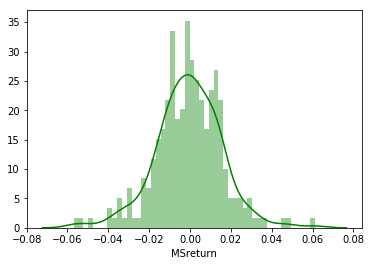

In [52]:
#creating a distribution plot for MS

sns.distplot(returns.loc['2015-01-01':'2015-12-31']['MSreturn'], bins=50, color='green')

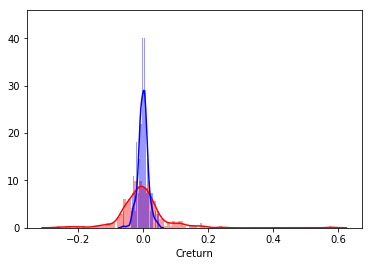

In [66]:
#analyzing citibank stocks for year 2008 using distplot

sns.distplot(returns.loc['2008-01-01':'2008-12-31']['Creturn'], bins=100, color='red')

sns.distplot(returns.loc['2015-01-01':'2015-12-31']['Creturn'], bins=100, color='blue')

#in 2008 std deviation for Citibank is strentched out to 0.6 which is 10 times std deviation of  around 0.06 in 2015
#this indicates the financial crisis of Citibank in year 2008

In [78]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

# Optional Plotly Method Imports
import plotly
import cufflinks as cf
cf.go_offline()

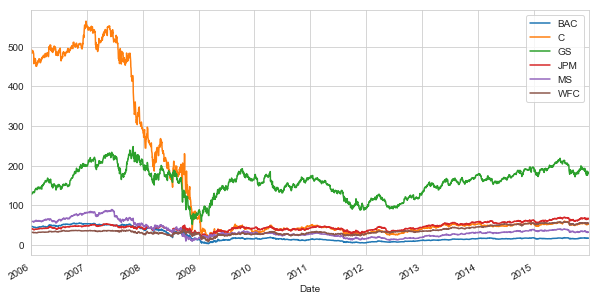

In [82]:
#line plot showing Close price for each bank for the entire index of time

for tick in tickers:
    bank_stocks[tick]['Close'].plot(label=tick,figsize=(10,5))
plt.legend()   


In [89]:
#creating a line plot using plotly to create dynamic view

bank_stocks.xs(key='Close', axis=1,level='Stock Info').iplot()

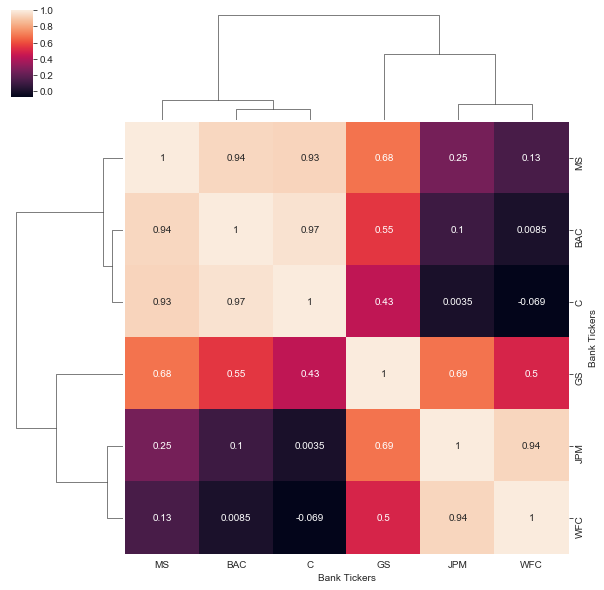

In [90]:
#Creating a cluster map to visualize the correlations betweek the stocks close price
sns.clustermap(bank_stocks.xs(key='Close',axis=1,level='Stock Info').corr(),annot=True)

#it has grouped C,BAC and MS into one group and WFC, JPM and GS into another group based on correlation.

In [ ]:
#hence through this project we can visualize the trends in stocks of 6 major banks over 7 years and identify:
#Financial crisis for Citibank
#Drop in stocks with the ingoing political scenario etc.